## **1-Project Overview**

The English Premier League is one of the most-watched soccer leagues globally, attracting an estimated 12 million viewers per game. Due to the significant financial benefits, all major EPL teams are interested in analytics and AI. In sports analytics, machine learning and artificial intelligence have become highly popular. The sports entertainment industry and its stakeholders widely use advanced algorithms to enhance profits and minimize the business risks associated with selecting or betting on the wrong players.

<br>

![image](https://www.sportscentralngr.com/news_images/1a33b4d0734682d0f4e33498c6335fef1715863327.jpg)

<br>

Regression is one of the foundational techniques in Machine Learning. As one of the most well-understood algorithms, linear regression plays a vital role in solving real-life problems.
In this project, we wish to use Linear Regression to predict the scores of EPL soccer players.
With the business implications cleared. Let's get into the project's technical details.

## **2-The Steps**


* What is Regression?
* Types of Regression
* What are Mean, Variance, and Standard Deviation?
* Correlation and Causation
* Underfitting and Overfitting
* Mathematics behind Regression
* Assumptions of Linear Regression
* Simple Linear Regression
* Understanding Interpolation and Extrapolation
* Coefficient of Determination ($R^2$)
* F - Statistics
* Diagnostic and Remedial Measures

## **3-Libraries and Packages**

#### **3.1-Which libraries do we use?**

* **pandas**: pandas is a fast, powerful, flexible, and easy-to-use open-source data analysis and manipulation tool built on top of the Python programming language. Refer to [documentation](https://pandas.pydata.org/) for more information.
 
* **NumPy**: The fundamental package for scientific computing with Python. Fast and versatile, the NumPy vectorization, indexing, and broadcasting concepts are the de-facto standards of array computing today. NumPy offers comprehensive mathematical functions, random number generators, linear algebra routines, Fourier transforms, and more. Refer to [documentation](https://numpy.org/) for more information. 
 
* **Matplotlib**: Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Refer to [documentation](https://matplotlib.org/) for more information.
 
* **seaborn**: Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. Refer to [documentation](https://seaborn.pydata.org/) for more information.
 
* **scikit-learn**: Simple and efficient tools for predictive data analysis accessible to everybody and reusable in various contexts.
It is built on NumPy, SciPy, and matplotlib to support machine learning in Python. Refer to [documentation](https://scikit-learn.org/stable/) for more information.
 
* **statsmodels**: statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests and statistical data exploration. Refer to [documentation](https://www.statsmodels.org/stable/index.html) for more information.
 
* **SciPy**: SciPy provides algorithms for optimization, integration, interpolation, eigenvalue problems, algebraic equations, differential equations, statistics, and many other classes of problems. Refer to [documentation](https://scipy.org/) for more information.

#### **3.2-Install and run packages**

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Install required packages with versions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
import scipy
from scipy import stats
from matplotlib.pyplot import figure

## **4-Data Reading**

#### **4.1-Load Data**

In many cases, the data is stored in local system. The format is CSV (Comma-separated values) that is a specific way to store data in a table structure format.

In [3]:
csv_file_path= "data.csv"

df = pd.read_csv(csv_file_path)

In [4]:
#view top 3 entries from the soccer data
df.head(3)

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
0,"Braund, Mr. Owen Harris",MUN,3.96,7.5,37.5,12.3,60,20.56,109.1,63.32,195.9,78.9,19.75
1,"Allen, Mr. William Henry",MUN,4.41,8.3,38.2,12.7,68,20.67,102.8,58.55,189.7,74.4,21.30
2,"Moran, Mr. James",MUN,4.14,5.0,36.4,11.6,21,21.86,104.6,55.36,177.8,69.1,19.88


In [5]:
df.columns

Index(['PlayerName', 'Club', 'DistanceCovered(InKms)', 'Goals',
       'MinutestoGoalRatio', 'ShotsPerGame', 'AgentCharges', 'BMI', 'Cost',
       'PreviousClubCost', 'Height', 'Weight', 'Score'],
      dtype='object')

#### **4.2-Data Dictionary**

* `PlayerName` : Player Name
* `Club` : Club of the player
  1. MUN:Manchester United F.C.
  2. CHE: Chelsea F.C.
  3. LIV: Liverpool F.C.
* `DistanceCovered(InKms)`: Average Kms distance covered by the player in each game
* `Goals`: Average Goals per match
* `MinutestoGoalRatio`: Minutes 
* `ShotsPerGame`: Average shots taken per game
* `AgentCharges`: Agent Fees in h
* `BMI`: Body-Mass index
* `Cost`: Cost of each player in hundread thousand dollars
* `PreviousClubCost`: Previous club cost in hundread thousand dollars
* `Height`: Height of player in cm
* `Weight`: Weight of player in kg
* `Score`: Average score per match

## **5-Exploratory Data Analysis**

Exploratory Data Analysis, commonly known as EDA, is a technique to analyze the data with visuals. It involves using statistics and visual techniques to identify particular trends in data. It is used to understand data patterns, spot anomalies, check assumptions, etc. The main purpose of EDA is to help look into the data before making any hypothesis about it.

#### **5.1-Dataframe Information**

The [dataframe.info()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) method prints information about the DataFrame, including the index dtype and columns, non-null values, and memory usage. It can be used to get basic info, look for missing values, and get a sense of each variable's format.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PlayerName              202 non-null    object 
 1   Club                    202 non-null    object 
 2   DistanceCovered(InKms)  202 non-null    float64
 3   Goals                   202 non-null    float64
 4   MinutestoGoalRatio      202 non-null    float64
 5   ShotsPerGame            202 non-null    float64
 6   AgentCharges            202 non-null    int64  
 7   BMI                     202 non-null    float64
 8   Cost                    202 non-null    float64
 9   PreviousClubCost        202 non-null    float64
 10  Height                  202 non-null    float64
 11  Weight                  202 non-null    float64
 12  Score                   202 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 20.6+ KB


There are total `202 rows` and `13 columns` in EPL Soccer Dataset. Observe that there are no null values in the dataset. Out of `13 columns`, `10` are float type and `1` is integer type. The remaining `2`, have object dtype.

#### **5.2-Basic Statistical Concepts**

* **`Mean`**: The mean is one of the measures of central tendency. Simply put, the mean is the average of the values in the given set. The observed values are totaled and divided by the total number of observations to determine the mean.

$$ \bar{x} = \sum_{i=1}^{n}\frac{x_i}{n} $$

* **`Variance`**: Variance is a measure of variation. It is calculated by averaging the squared deviations from the mean. The greater the spread of the data, the greater the variance in proportion to the mean.

$$S^2 = \frac{\sum_{i=1}^{n}(x_i-\bar x)^2}{n-1}$$

* **`Standard Deviation`**: The standard deviation is a measure that shows how much variation (such as spread, dispersion, and spread) exists from the mean. It is a popular measure of variability since it returns to the data set's original units of measurement.

$$S = \sqrt \frac{\sum_{i=1}^{n}(x_i-\bar x)^2}{n-1}$$

#### **5.3-Dataframe Description**

To generate descriptive statistics [pandas.dataframe.describe()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) function is used. Descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values. The quartiles provide an excellent insight into the range of a set of data. You may easily establish where your data sits in the range and which quartile you fall into by knowing the percentile points 25th, 50th, and 75th, as well as your own data point.
 
* The `25th percentile` is also referred to as the first, or lower, quartile. The 25th percentile is the figure at which 25% of the data falls below it and 75% of the answers fall above it.
* The `Median` is also known as the `50th percentile`. The median divides the set of data in half. Half of the data points are below the median, while the other half are above it.
* The `75th percentile` is often referred to as the third, or upper, quartile. The 75th percentile is the value at which 25% of the responses are higher and 75% of the answers are lower.

In [7]:
df.describe()

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4.718614,7.108663,43.091584,14.566337,76.876238,22.955891,69.021782,64.873713,180.103960,75.008168,13.507426
std,0.457976,1.800549,3.662989,1.362451,47.501239,2.863933,32.565333,13.070197,9.734494,13.925574,6.189826
min,3.800000,3.300000,35.900000,11.600000,8.000000,16.750000,28.000000,34.360000,148.900000,37.800000,5.630000
25%,4.372500,5.900000,40.600000,13.500000,41.250000,21.082500,43.850000,54.667500,174.000000,66.525000,8.545000
50%,4.755000,6.850000,43.500000,14.700000,65.500000,22.720000,58.600000,63.035000,179.700000,74.400000,11.650000
75%,5.030000,8.275000,45.575000,15.575000,97.000000,24.465000,90.350000,74.750000,186.175000,84.125000,18.080000
max,6.720000,14.300000,59.700000,19.200000,234.000000,34.420000,200.800000,106.000000,209.400000,123.200000,35.520000


#### **5.4-Correlation**

Correlation coefficient is used to measure the strength of relationship between two variables. It indicates that as the value of one variable changes the other variable changes in a specific direction with some magnitude. There are various ways to find correlation between two variables, one of which is Pearson correlation coefficient. Let's say $x$ and $y$ are two continuous variables, the `Pearson correlation coefficient` between them can be found by the following formula.
 
 
$$r = \frac{ \sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y}) }{%
        \sqrt{\sum_{i=1}^{n}(x_i-\bar{x})^2}\sqrt{\sum_{i=1}^{n}(y_i-\bar{y})^2}}$$
 
 
Their strength of relationship is measured by the absolute value of coefficient, whereas the sign of the coefficient indicates the direction of the relationship.

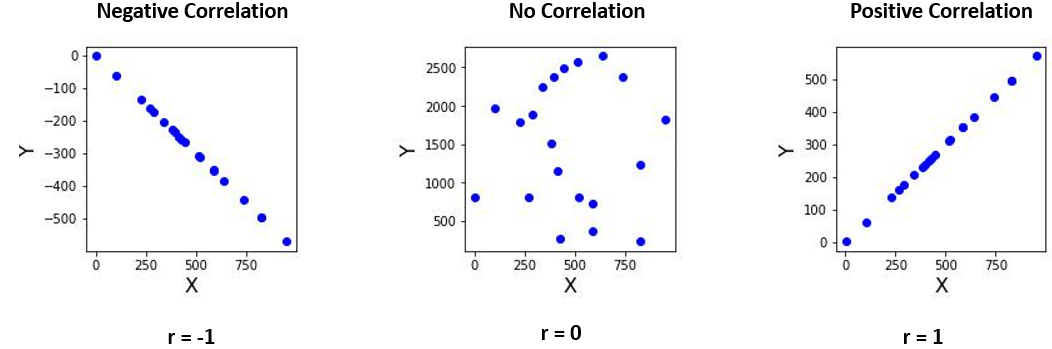

1. $r = -1$ indicates a `perfect negative` relationship between the variables 
2. $r = 0$ indicates `No relationship` between the variables
3. $r = 1$ indicates a `perfect positive` relationship between the variables

To find correlation between variables from the soccer data we will use [pandas.dataframe.corr()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) method. It computes pairwise correlation between two columns by excluding NA or NaN values if any. The default method used to calculate correlation coefficient is pearson correlation.

In [8]:
numerical_df = df.loc[: , ['DistanceCovered(InKms)', 'Goals','MinutestoGoalRatio', 'ShotsPerGame', 'AgentCharges', 
                           'BMI', 'Cost', 'PreviousClubCost', 'Height', 'Weight', 'Score']]

In [9]:
numerical_df.corr()

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
DistanceCovered(InKms),1.000000,0.147098,0.924964,0.888800,0.250865,0.299471,-0.403004,0.550975,0.358854,0.403743,-0.493512
Goals,0.147098,1.000000,0.153333,0.134721,0.131973,0.177032,0.137131,0.102734,0.076958,0.155844,0.108114
MinutestoGoalRatio,0.924964,0.153333,1.000000,0.950757,0.258240,0.320527,-0.449135,0.583375,0.371192,0.423699,-0.532449
ShotsPerGame,0.888800,0.134721,0.950757,1.000000,0.308391,0.382524,-0.435429,0.610986,0.352322,0.455255,-0.531522
AgentCharges,0.250865,0.131973,0.258240,0.308391,1.000000,0.302556,-0.108243,0.317581,0.123255,0.273686,-0.183386
BMI,0.299471,0.177032,0.320527,0.382524,0.302556,1.000000,0.321116,0.713858,0.337097,0.845955,0.187558
Cost,-0.403004,0.137131,-0.449135,-0.435429,-0.108243,0.321116,1.000000,-0.207749,-0.071253,0.154227,0.963017
PreviousClubCost,0.550975,0.102734,0.583375,0.610986,0.317581,0.713858,-0.207749,1.000000,0.802119,0.930904,-0.361850
Height,0.358854,0.076958,0.371192,0.352322,0.123255,0.337097,-0.071253,0.802119,1.000000,0.780906,-0.188022
Weight,0.403743,0.155844,0.423699,0.455255,0.273686,0.845955,0.154227,0.930904,0.780906,1.000000,-0.000162


##### **Correlation between Cost and Score**
The correlation between `Cost` and the target variable `score` is **+0.96** indicates positive correlation. It means when Cost increases by 1 unit, the score of player increase by 0.96 unit and vice versa. 

## **6-Split Data to Train and Test**

#### **6.1-Why do we split data?**

The data points are divided into two datasets, train and test, in a train test split method. The train data is used to train the model, and the model is then used to predict on the test data to see how the model performs on unseen data and whether it is overfitting or underfitting.

<br>

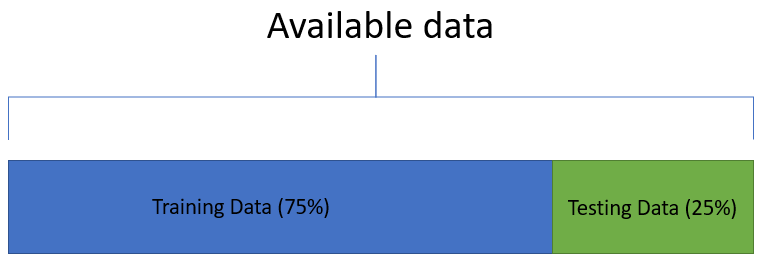

The data is first assigned to input variable (x) and output variable (y) accordingly, then the train test split function from sklearn is used to perform splitting into a ratio of 75:25 with a random state of 100. The random state is a seed given to randomly generate indices for train and test sets.

In [10]:
# Assign x, y then do training testing split
x=df['Cost']
y=df['Score']

# Splitting with 75% training, 25% testing data
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    train_size = 0.75,
                                                    test_size = 0.25, 
                                                    random_state = 100)

#### **6.2-Underfitting vs. Overfitting**


* **`Underfitting`**: Underfitting occurs when a statistical model or machine learning algorithm fails to capture the underlying trend of the data, i.e., it performs well on training data but poorly on testing data. Its occurrence merely indicates that our model or method does not adequately suit the data. It frequently occurs when we select a simpler model yet the data contains complicated non-linear patterns or when there is insufficient data to develop a linear model. The obvious approach is to build a complex model or increase the number of linear features in the data.
 
* **`Overfitting`**: When a statistical model fails to produce correct predictions on testing data, it is said to be overfitted. When a model is trained with a large amount of data, it begins to learn from the noise and incorrect data entries in our data set. It usually occurs when we build a complex model on a simpler dataset. An overfitted model performs well on training data because it has memorized the patterns in the data, but it performs poorly on testing data. 

## **7-Linear Regression**

#### **7.1-Defition**

Linear Regression is a statistical approach to modeling the linear relationship between predictor variables and the target variable. These variables are known as the independent and dependent variables, respectively. When there is one independent variable, it is known as **Simple Linear Regression**. When there are more independent variables, it is called **Multiple Linear Regression**.

**`Simple Linear Regression`**:   $\hat y = \beta_0+\beta_1x+\epsilon$

**`Multiple Linear Regression`**: $\hat y = \beta_0+\beta_1x_1+\dots \beta_px_p+\epsilon$ where $p$ is... number of features in the model

#### **7.2-Mathematics behind Linear Regression**

Here's the formula for simple linear regression.
 
$$y=\beta_0+\beta_1x+\epsilon$$
 
* For any given value of the independent variable (x), y is the predicted value for the dependent variable (y).
* $\beta_0$ represents the intercept, or the predicted value of y when x is 0.
* $\beta_1$is the regression coefficient, which tells us how much y will change as x increases.
* x is the independent or predictor variable that helps us predict y
* $\epsilon$ is the error left due to not so accurate calculation of the regression coefficients.
 
Linear regression determines the best fit line across data by looking for the regression coefficient (B1) that minimizes the model's total error (e).

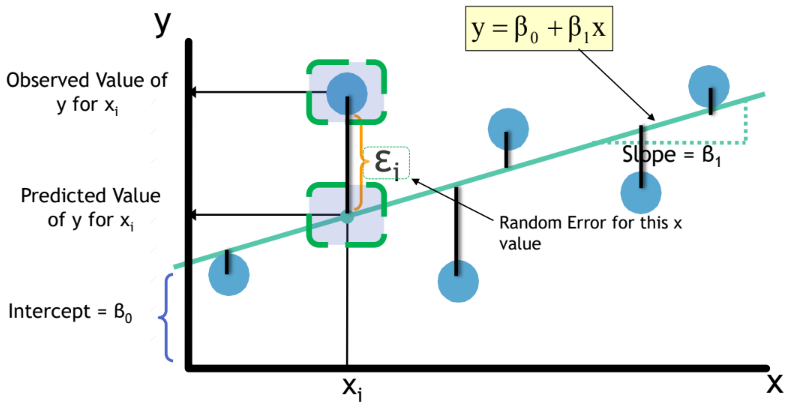

* The distance between the predicted value of y on the regression line and the corresponding true value of y is basically the error.

#### **7.3-Errors in Regression**

In the above plot, it is visible that the regression line is not able to exactly predict the true values. There is always going to be some space for errors.
 
* **`Sum of Squared Errors (SSE)`**: It is calculated by summing the squared differences between the observed values and the predicted values. It's also called **"Unexplained Variability"**.
$$SSE = \sum_{i=1}^{n}e_{i}^2$$

* **`Sum of Squared Regression (SSR)`**: It is the sum of the differences between the predicted value and the mean of the dependent variable. It's also called **"Explained Variability"**.
$$SSR = \sum_{i=1}^{n}(y-\hat y)^2$$

* **`Sum of Squares Total (SST)`**: It is sum of SSR & SSE.
$$SST = SSR + SSE$$

The best scenario is that SSE equals 0 and it means all variability comes from the explained.

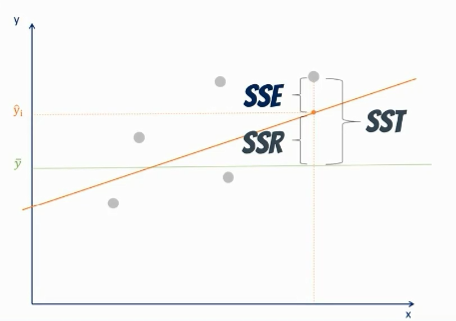

#### **7.5-Assumptions**

Linear regression is a parametric model which means it requires the specification of some parameters before they can be used to make predictions. These parameters or assumptions are:

**1-Linearity**: The line of best fit through the data points is a straight line. `Fixing`: *Transform data* 

**2-Normality**: The data follows a normal distribution. `Fixing`:  *Large size of data , Check Q-Q Plot , Check Histogram* 

**3-No-Constant Variance**: Means homogeneity of variance of residuals across the values of the independent variable. `Fixing`: *Check Outlier , Check Residual Plot , Transform data* 

**4-No-Auto Correlation**: The errors should be auto correlated. It happens for time series data which are related to each other. `Fixing`: *Use independant data*

**5-No-Endogeneity**: We should make sure we consider all related variables. Also, if the Durbin Watson value is bigger than or less than 3, it's good.  `Fixing`: *Expert's viewpoints*.

## **8-Build the Model**

#### **8.1- Create Regression Model**

We are going to model the relationship between `Cost` and `Scores` using Ordinary Least Squares of the statsmodels library.

In [11]:
# fit the model
lr = sm.OLS(y_train, x_train).fit()

# Printing the parameters
lr.params
lr.summary()

#force intercept term
x_train_with_intercept = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_with_intercept).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     1976.
Date:                Tue, 09 Jul 2024   Prob (F-statistic):           6.91e-88
Time:                        22:07:14   Log-Likelihood:                -293.23
No. Observations:                 151   AIC:                             590.5
Df Residuals:                     149   BIC:                             596.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9472      0.325      2.916      0.0

#### **8.2- Apply on Test Data**

Now, we can predict on test

In [12]:
x_test_with_intercept = sm.add_constant(x_test)
y_test_fitted = lr.predict(x_test_with_intercept)

## **9-Analysis the Result**

Now that we have successfully modeled let's evaluate the results and summary of the model:

#### **9.1-Dep. Variable**

It shows which variable is response for the model.

#### **9.2-Model & Method**

It shows we are using the regression model based on which type. Fot this model, we are using OLS.

#### **9.3-No. Observations**

It shows how many rows (data) from train model we are using.

#### **9.4-$R^2$**

$R^2$ is expressed between 0 and 1 for the level of variance explained. As we learned in the previous section, the ratio $\frac{SSE}{SST}$ should be low for a robust model, this ratio signifies the error or unexplained variance by the independent variable(s).
 
$$ R^2 = 1 - \frac{SSE}{SST} $$

We got an $R^2$ of **0.93** which is pretty good.

#### **9.5-F-statistic & Prob (F-statistic)**

* **F-Statistic**: It can be used for hypothesis testing about whether the slope is meaningful or not. F-statistics is a statistic used to test the significance of regression coefficients in linear regression models. The `null hypothesis` is that the slope is 0 or there is `"No relationship between the predictor and target variables"`. 
 
* **Prob (F-Statistic)**: It is the p-value of F-statistic. If it is less than 0.05, means we reject null hypothesis and it measn theer is relationship and the model is meaningful.

#### **9.6-coef**

It shows the slope for $\beta_1$. Based on the table, for each one unit increase in `Cost`, we can expect **0.1821** increase in `Score`.

#### **9.7-P>|t|**

It says the same thing like coef. There is `null hypothesis that indiciate that predictor variable is not useful for model`. If the P-value is less than 0.05, we reject it and it means that variable is useful because the slope is not 0. For this mode, the P-value is **0.000** and means the variable Cost is important.

## **10-Analysis the Assumption**

#### **10.1- Linearity**

We can draw scatter plot to see the shape of the line.

> ##### **Train data**

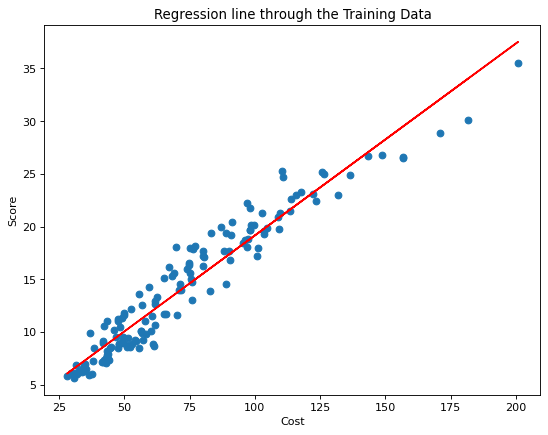

In [13]:
#Scatter plot for TRAINING
b0=lr.params[0]
b1=lr.params[1]

figure(
    figsize=(8, 6), 
    dpi=80)

plt.scatter(
    x_train,
    y_train)

plt.plot(x_train, 
         b0+ b1*x_train, 
         'r')

#lable
plt.xlabel("Cost")
plt.ylabel("Score")
plt.title("Regression line through the Training Data")
plt.show()

The regression line has a good fitting, it probably deviates a little after a cost of 125 or so. The line is straight and linearity is ok.

> ##### **Test data**

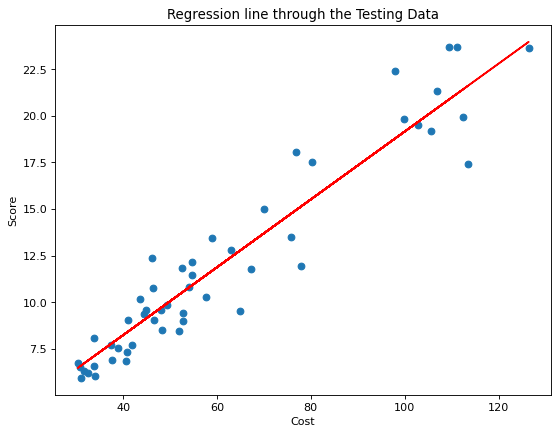

In [16]:
# Scatter plot for TESTING
figure(
    figsize=(8, 6), 
    dpi=80)

plt.scatter(
    x_test,
    y_test)

plt.plot(x_test, 
         y_test_fitted, 
         'r')

#lable
plt.xlabel("Cost")
plt.ylabel("Score")
plt.title("Regression line through the Testing Data")
plt.show()

#### **10.2- Normality**

Even though the size of data is big enough, we can run Q-Q plot to see data obeys normal distribution or not.

> ##### **Train data**

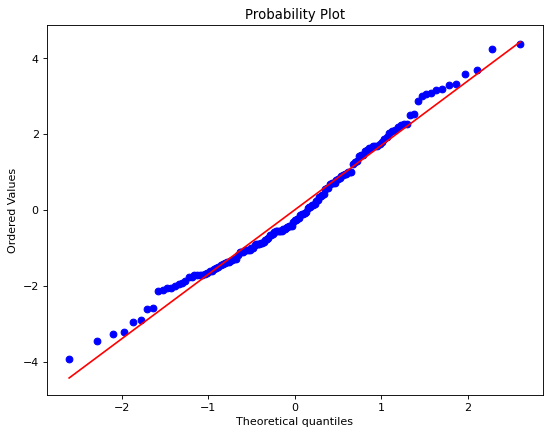

In [17]:
#QQ Plot for residual (difference between data and predicition)
predictions_y_train = lr.predict(x_train_with_intercept)
r_i_train = (y_train - predictions_y_train)

figure(
    figsize=(8, 6), 
    dpi=80)

scipy.stats.probplot(r_i_train,
                     plot=plt)
plt.show()

> ##### **Test data**

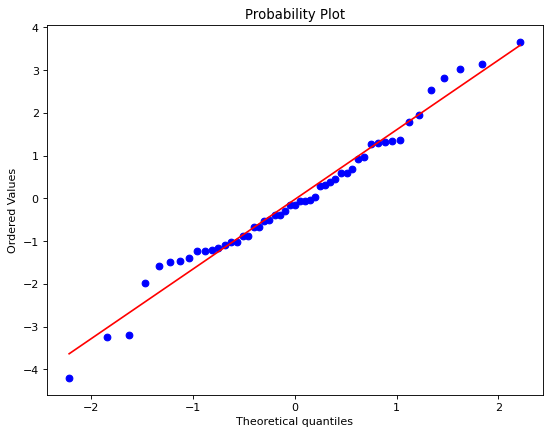

In [18]:
predictions_y_test = lr.predict(x_test_with_intercept)
r_i_test = (y_test - predictions_y_test)

figure(
    figsize=(8, 6), 
    dpi=80)

scipy.stats.probplot(r_i_test,
                     plot=plt)
plt.show()

Now, we can check histogram.

> ##### **Train data**

<Figure size 640x480 with 0 Axes>

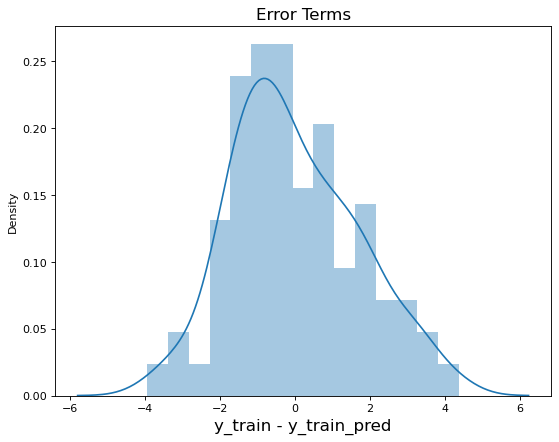

In [19]:
#Check histogram for residual (difference between data and predicition)
fig = plt.figure()

figure(
    figsize=(8, 6), 
    dpi=80)

sns.distplot(r_i_train, 
             bins = 15)

plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

> ##### **Test data**

<Figure size 640x480 with 0 Axes>

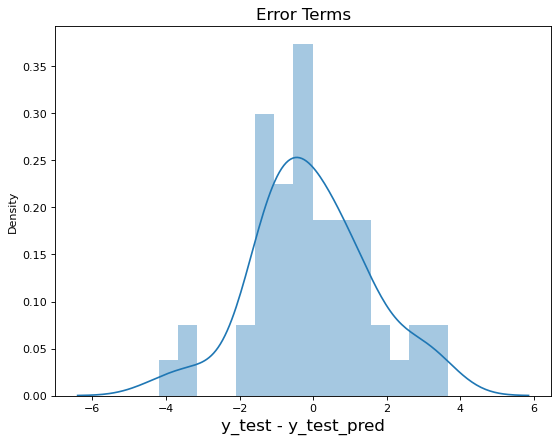

In [20]:
fig = plt.figure()

figure(figsize=(8, 6),
       dpi=80)

sns.distplot(r_i_test, 
             bins = 15)

plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_test - y_test_pred', fontsize = 15)
plt.show()

#### **10.3- No-Constant Variance**

We can see box plot to see whether we have any outliers or not.

> ##### **Train data**

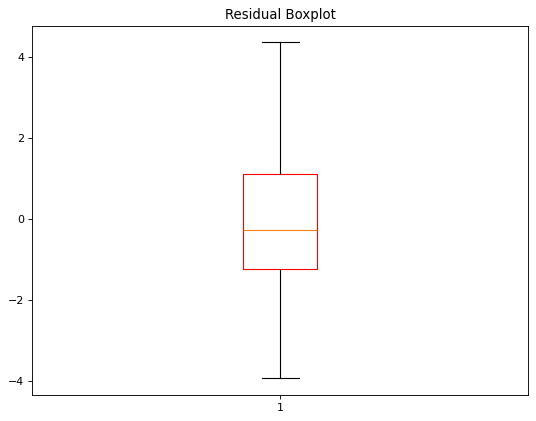

In [21]:
#Boxplot for outliers for residual (difference between data and predicition)
figure(figsize=(8, 6), 
       dpi=80)

plt.boxplot(r_i_train, 
            boxprops=dict(color='red'))

plt.title('Residual Boxplot');

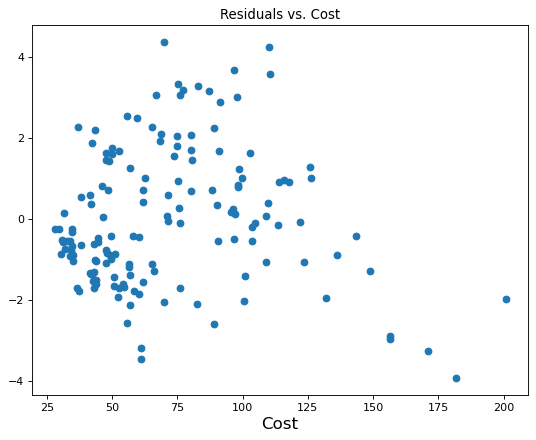

In [22]:
#Residuals vs. predictor in training data
figure(figsize=(8, 6), 
       dpi=80)

plt.title('Residuals vs. Cost')

plt.xlabel('Cost',fontsize=15)

plt.scatter(x_train,
            r_i_train)
plt.show()

> ##### **Test data**

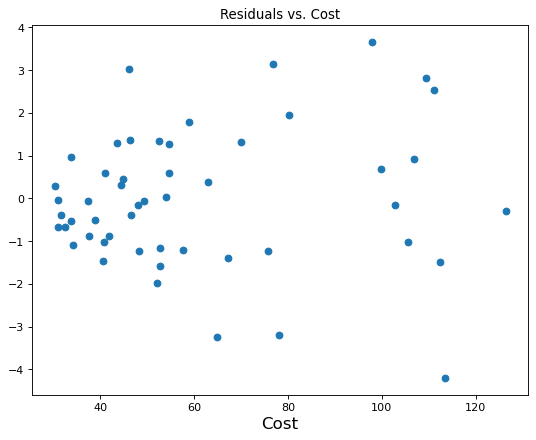

In [23]:
#Residuals vs. predictor
figure(figsize=(8, 6), dpi=80)

plt.title('Residuals vs. Cost')

plt.xlabel('Cost',fontsize=15)

plt.scatter(x_test, 
            r_i_test)
plt.show()

We see a densitiy in beginning and dispersion in end. So we can transform data.

#### **10.4- No-Auto Correlation**

Just because these data are totally independent from differenet player and they are not related to each other, we don't need to worry about this assumption.

#### **10.5- No-Endogeneity**

We are pretty sure we considered all important variables. Otherwise for making sure omitted variable, we can talk with expert people.

## **11-Transform Data (Tackle No-Constant Variance)**

Non-constant variance can be a problem in linear regression, as the assumption of constant variance of the errors is a key requirement for the ordinary least squares (OLS) method to be unbiased and efficient. When this assumption is violated, the regression coefficients can be inefficient and/or the predictions can be biased. To avoid non-constant variance, there are different data transformations that can be applied.

* `Log transformation`: This transformation is often used when the variance of the data increases with the mean. A log transformation can be used to stabilize the variance by converting the data into logarithmic values.

* `Square root transformation`: This transformation is also used to stabilize the variance by converting the data into square root values.

* `Box-Cox transformation`: This is a statistical transformation that is used to stabilize the variance by transforming the data into values that are closer to a normal distribution. The Box-Cox transformation is a more flexible and powerful transformation compared to the log and square root transformations.

We'll try different transformations such as square root, log, and box-cox to see if we can introduce linearity with these transformations.

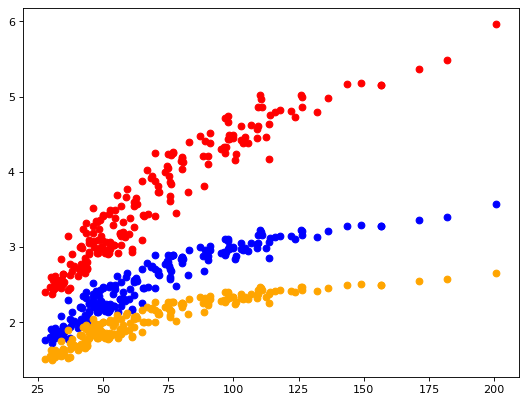

In [24]:
#Square Root Transformation
sqrt_y = np.sqrt(y)
figure(figsize=(8, 6), dpi=80)

plt.scatter(x, 
            sqrt_y, 
            color = 'red');

#Log Transformation
ln_y=np.log(y)
plt.scatter(x, 
            ln_y,
            color='blue');

#Box-Cox Transformation
bc_y=list(stats.boxcox(y))
bc_y=bc_y[0]
plt.scatter(x, 
            bc_y,
            color='orange');

So, we take `Square Root Transformation` and build the model again.

In [25]:
x_train_transformed, x_test_transformed, y_train_transformed, y_test_transformed = train_test_split(x,
                                                                                                    sqrt_y,
                                                                                                    train_size = 0.75,
                                                                                                    test_size = 0.25, 
                                                                                                    random_state = 100)

In [26]:
#force intercept term
x_train_with_intercept_transformed = sm.add_constant(x_train_transformed)
lr_transformed = sm.OLS(y_train_transformed, x_train_with_intercept_transformed).fit()
print(lr_transformed.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     1267.
Date:                Tue, 09 Jul 2024   Prob (F-statistic):           9.72e-75
Time:                        22:24:32   Log-Likelihood:                -17.200
No. Observations:                 151   AIC:                             38.40
Df Residuals:                     149   BIC:                             44.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9674      0.052     37.683      0.0

> ##### **Train data**

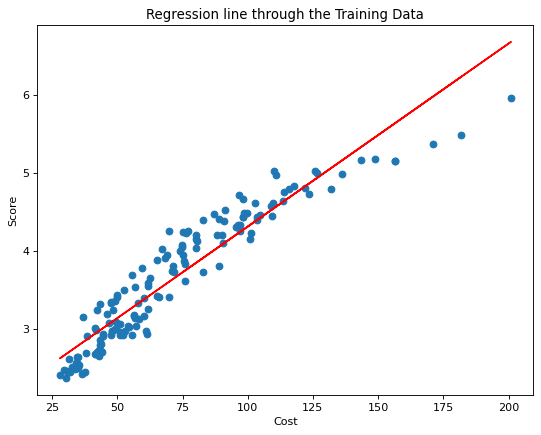

In [27]:
#Scatter plot for dependant and response variable
b0_transformed=lr_transformed.params[0]
b1_transformed=lr_transformed.params[1]

figure(
    figsize=(8, 6), 
    dpi=80)

plt.scatter(
    x_train_transformed,
    y_train_transformed)

plt.plot(x_train_transformed, 
         b0_transformed+ b1_transformed*x_train_transformed, 
         'r')

#lable
plt.xlabel("Cost")
plt.ylabel("Score")
plt.title("Regression line through the Training Data")
plt.show()

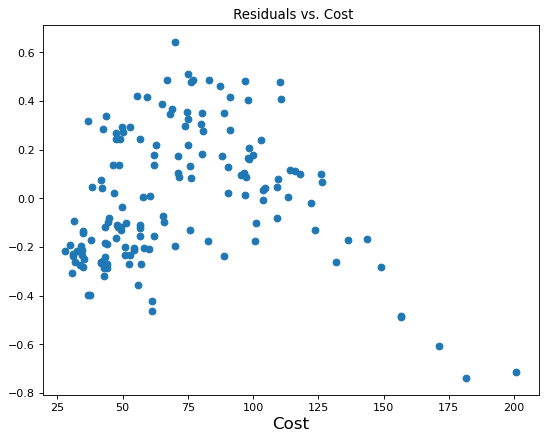

In [28]:
predictions_y_train_transformed = lr_transformed.predict(x_train_with_intercept_transformed)
r_i_train_transformed = (y_train_transformed - predictions_y_train_transformed)

#Residuals vs. predictor in training data
figure(figsize=(8, 6), 
       dpi=80)

plt.title(' Residuals vs. Cost')

plt.xlabel('Cost',fontsize=15)

plt.scatter(x_train_transformed,
            r_i_train_transformed)
plt.show()

> ##### **Test data**

Now, we can see result on test

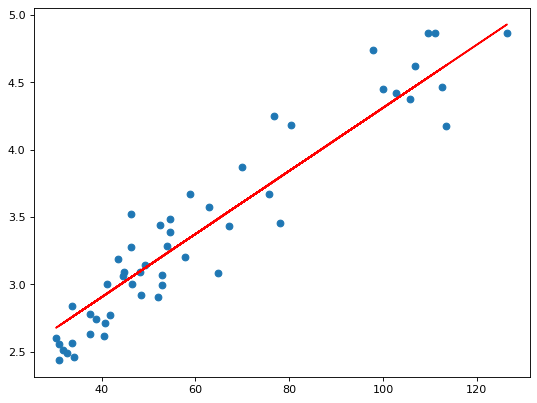

In [29]:
#Plot the fitted line on test data
x_test_with_intercept_transformed = sm.add_constant(x_test_transformed)
predictions_y_test_transformed = lr_transformed.predict(x_test_with_intercept_transformed)

figure(figsize=(8, 6), dpi=80)
plt.scatter(x_test_transformed, y_test_transformed)
plt.plot(x_test_transformed, predictions_y_test_transformed, 'r')
plt.show()

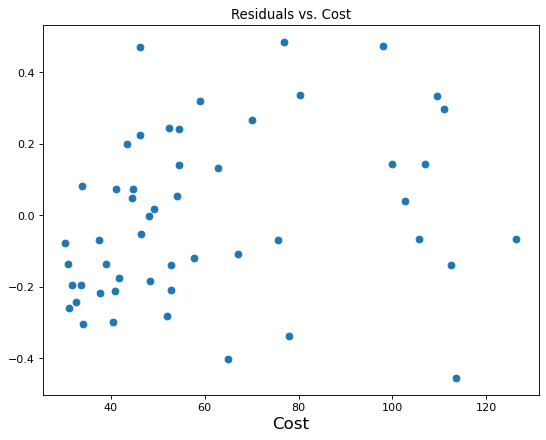

In [30]:
#Diagnostics
r_i_test_transformed = (y_test_transformed - predictions_y_test_transformed)

#Residuals vs. predictor
figure(figsize=(8, 6), dpi=80)
plt.title('Residuals vs. Cost')
plt.xlabel('Cost',fontsize=15)
plt.scatter(x_test_transformed, r_i_test_transformed)
plt.show()